# Basic Setup

### Install the BabyRobot Environment

In [1]:
%pip install -q ipycanvas==0.11 -q
%pip install --upgrade babyrobot -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Display the version number of the 'babyrobot' library that's just been installed:

In [6]:
import gym
print(f"Gym Version = {gym.__version__}")

import babyrobot
print(f"Baby Robot Version = {babyrobot.__version__}")

Gym Version = 0.25.2
Baby Robot Version = 1.0.11


### Load the required libraries

In [5]:
import numpy as np
import string
import os
import json
import time

from babyrobot.envs.lib import Actions

# to enable ipycanvas support on Google Colab
if 'COLAB_GPU' in os.environ:
  print("Loading Google Colab Imports")
  from google.colab import output
  output.enable_custom_widget_manager()

# Examine the Environment

In the Jupyter Notebook cells, below, quite often the first cell is used to define the environment and the next cell is used to display that environment. Additionally, when animations are displayed, the first cell will draw the initial grid view and then the second cell with cause the animations to take place in that graphical cell. So, the important thing to remember is, if you don't see anything happening immediately, try executing the next cell.

</br>
</br>

### Creating an Environment

The standard way to create a Gym environment is by using the '_gym.make_' function.
This function takes the name of the environment to create and the setup parameters that define the environment.

In the examples given below we first create an environment and then render it, to see what we've made. Unfortunately in the latest versions of Gym this is no longer possible (from version 0.24.0 (25th May 2022)). Gym now forces you to call the '_reset_' function before calling '_render_'. To avoid this we can create the BabyRobot environment using the custom make function:


```
babyrobot.make( environment_name, **setup_parameters )
```

This creates the environment in a way that allows '_render_' to be called directly, without a '_reset_' having to be done (the environment has just been created, so is already in its initial state). Additionally it removes other warnings that the latest version of Gym can now produce. (for full details check out the function comments in the _[source](https://github.com/WhatIThinkAbout/BabyRobotGym/blob/main/babyrobot/lib/utils.py)_)






### Default Render Operation

By default the Baby Robot environment starts with a grid of size 3x3, with the Start cell at the top-left and Exit at the bottom-right:

In [7]:
# create and display the environment
env = babyrobot.make("BabyRobot-v0")
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)

### Basic Reinforcement Learning Loop

Take random actions in the environment until the Exit is reached.
(Note, because Baby Robot is following a random path it can take a while to reach the exit!)

In [9]:
env = babyrobot.make("BabyRobot-v0")
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)

In [11]:
# initialize the environment
env.reset()

# move until the exit is found
done = False
while not done:  

  # choose a random action
  action = env.action_space.sample()   

  # take the action and get the information from the environment
  new_state, reward, done, truncated, info = env.step(action)
  
  # show the current position
  env.render() 

### Step Function Backwards Compatibility

Prior to Gym version [0.25.0](https://github.com/openai/gym/releases/tag/0.25.0), the '_step_' function returned a single '_done_' boolean value to indicate if the episode had reached a conclusion. In the latest versions of Gym this has now been split into 2 booleans, '_terminated_' and '_truncated_'.

By default, when using the '_babyrobot.make_' function, it will create an environment with a step function that uses the new, 2 boolean, format. However, by setting the <i>'new_step_api'</i> setup parameter to False, the old, single boolean, format can be created (it will not return the '_truncated_' parameter shown above):

In [12]:
# create a default environment
# - this gives 2 boolean ouputs for the step function: 'terminated' and 'truncated'
env = babyrobot.make("BabyRobot-v0")
env.reset()
env.step(env.action_space.sample())

(array([0, 1]), -1, False, False, {'target_reached': True})

In [ ]:
# create a backwards compatible environment
# - this gives a single boolean ouput for the step function's 'done' value
setup = {'new_step_api':False}
env = babyrobot.make("BabyRobot-v0",**setup)
env.reset()
env.step(env.action_space.sample())

### Observation Space

The observation space simply returns the co-ordinates of Baby Robot's position in the grid. 

These are zero based:
* top-left cell     = [0,0] 
* bottom-right cell = [ grid_width-1, grid_height-1 ]

In [15]:
env = babyrobot.make("BabyRobot-v0")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (2,)
Sample observation [1 2]


### Action Space

There are 5 possible actions:

* North, East, South and West
* Stay (equivalent to not taking an action)

When running with a dynamic action space only the valid actions will be available for each cell. 
Therefore, in the Start cell, the aciton space will consist of only 2 actions: South and East.

In [16]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 2
Action Space Sample 3


In [17]:
# Discrete Action Space
# - all actions (even invalid ones) are possible in all states
setup = {'action_space':'discrete'}
env = babyrobot.make("BabyRobot-v0",**setup)

print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 5
Action Space Sample 2


## Grid Basics

The _setup_ object is used to supply initial properties that define how the environment should look on startup.

### Grid Size

The size of the grid can be set using the _width_ and _height_ properties:

In [18]:
setup = { 'width': 5,
          'height': 4 }

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()          

MultiCanvas(height=260, sync_image_data=True, width=324)

### Setting the Start and Exit Positions

The positions of the Start and Exit can be defined using _start_ and _end_:

In [19]:
setup = { 'start': [0,1], 
          'end': [2,1] }   

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()           

MultiCanvas(height=196, sync_image_data=True, width=196)

### Adding a Compass

A compass can be added to the right of the grid using the <i>add_compass</i> property:

In [20]:
setup = { 'add_compass':True }

env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=296)

### Information Panels

To show information about an episode, information panels can be added to the right or below the grid area. 

The size and color of these panels can be specified:

In [21]:
bottom_panel = {'width':396,'height':50,'color':'green','text_fg':'blue'}
side_panel   = {'width':200,'height':196,'color':'blue','text_fg':'yellow'}

setup = {}
setup['bottom_panel'] = bottom_panel
setup['side_panel'] = side_panel

In [22]:
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=246, sync_image_data=True, width=396)

<b><i>show_info</i></b>

Used to write to an information panel.

An information items has the following format:

<i>((x,y),text)</i>

Where:

- _(x,y)_ is the location of the item in the information panel
- _text_ is the string to display

Information items can then be bundled into an array and used as the value in a key-value pair that specifies which panel the information should be added to.

In [23]:
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=246, sync_image_data=True, width=396)

In [24]:
side_info = [((10,10),"Hello"),((10,30),"Side Panel")]
bottom_info = [((10,10),"Hello"),((10,30),"Bottom Panel")]

info = {}
info['side_info'] = side_info
info['bottom_info'] = bottom_info

env.show_info(info)

## Adding Grid Level Components

### Adding Walls

An array of wall definitions can be given when creating the environment. Each item in this array defines the grid coordinate and side of the cell where the wall should be placed:

In [25]:
setup = { 'width': 4, 'height': 4, 'add_compass':True }
walls = [((1, 0),'S'),
         ((1, 1),'E'),
         ((2, 2),'N'),
         ((3, 2),'W')]
setup['walls'] = walls

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=260, sync_image_data=True, width=360)

### Add Repeated Walls

When a wall needs to be added, in a straight line, across multiple grid cells, a repeating parameter may be specified. In this case each wall definition becomes:

```
((x,y,num_cells),side)
```

where:

* _x_ and _y_ are the coordinates of the initial cell in which to add the first section of wall
* <i>num_cells</i> is the number of cells across which the wall should span
* _side_ is the side of the cell to which the wall should be added, chosen from 'N','E','S' or 'W'.

When a wall is specified on either the top or bottom of the cell ('N' or 'S') then the wall sections will be repeated for the specified number of cells to the right of the initial cell, to form a horizontal wall. 

For walls specified on either the left or right ('E' or 'W'), the walls will be repeated below the initial cell, to give a vertical wall.

_Example:_

((3, 0, 4),'S') - will draw a horizontal wall, starting on the South edge of grid cell (3,0) and extending over a total of 4 cells.

((1, 1, 2),'E') - will draw a vertical wall, starting on the East edge of grid cell (1,1) and extending over a total of 2 cells.

((3, 2),'N') - just draws a single cell wall on the North side of of grid cell (3,2)

In [26]:
setup = { 'width': 8, 'height': 4, 'add_compass':True }
walls = [((3, 0, 4),'S'),
         ((1, 1, 2),'E'),
         ((3, 2),'N')]
setup['walls'] = walls

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=260, sync_image_data=True, width=616)

### Add a Maze

A maze can be defined by setting the 'add_maze' parameter to true in the setup. The actual walls that are shown are controlled by the 'maze_seed' parameter. The maze that is created will have a single path to the exit.

Additionally, the start and end of the maze may not be positioned at the top-left and bottom-right of the grid, so you may need to move the Start and Exit, as defined above.

In [27]:
setup = { 'width': 8,
          'height': 5,
          'add_maze': True,
          'maze_seed': 42,
          'end': [5,4]
        }     

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()    

MultiCanvas(height=324, sync_image_data=True, width=516)

### Remove Walls

The default maze only has a single path to the exit. To make more than one path, walls may be removed. This is a simple toggle operation - if a wall is defined at a particular location and one exists there already, then it will be removed.

In [28]:
walls = [((2, 0),'E'), # remove the east wall at (2,0)
         ((2, 2),'E'), # remove the east wall at (2,2)
         ((3, 2),'E'), # remove the east wall at (3,2)
         ((5, 2),'E')] # add an east wall at (5,2)        
setup['walls'] = walls

env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 

MultiCanvas(height=324, sync_image_data=True, width=516)

### Add Puddles

Puddles can be used to add a probabilistic component to the grid. Rather than simply moving to the target cell and receiving a reward of -1, a puddle will potentially cause Baby Robot to skid. If this occurs he will end up in a cell other than a target. Additionally, since puddles take longer to move through, they receive a larger negative reward.

There are two sizes of puddle, with the following default properties:

  * small puddles: reward = -2, probability of reaching target = 0.6
  * large puddles: reward = -4, probability of reaching target = 0.4

A puddle item is defined by:

<i>((x,y),puddle_size)</i>

where:

- _(x,y)_ is the location of the puddle
- _puddle_size_ is either 1 for a small puddle or 2 for a large puddle

In [29]:
setup = {}
puddles = [((1,1),2),           
           ((1,0),1)]
setup['puddles'] = puddles

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)

### Puddle Demo:

The code below demonstrates what happens when Baby Robot moves into a puddle.
* On the first step, when he enters the large puddle, he's given a reward of -4.
* On the second step he tries to move East, to the Exit. However, since he's in a puddle there's a chance he may skid, in which case he'll end up in one of the other possible states.

In [33]:
def puddle_test():
  env.reset()
  for step in range(2):    
    action = Actions.East
    new_state, reward, done, truncated, info = env.step(action)
    info_str = f"{Actions(action): <5}: {new_state} reward = {reward}"  
    target_str = f"Target Reached = {info['target_reached']}"
    env.render(info = {'side_info': [((10,100),info_str),((10,130),target_str)]}) 

In [34]:
setup = { 'start':[0,1], 'end': [2,1] , 'add_compass':True }        
setup['side_panel'] = {'width':200,'color':'#ddd'}
setup['walls'] = [((0, 1),'N'),((0, 1),'S')]
setup['puddles'] = [((1,1),2)]

env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=396)

In [35]:
# run this a few times to see the effect of stepping into a puddle
puddle_test() 

### Changing the Puddle Properties

The default rewards and probability of skidding can be changed using the <i>puddle_props</i> attribute:

In [36]:
setup['puddles'] = [((1,1),2),((1,0),1)]

# change the default puddle rewards and probabilities of reaching target
setup['puddle_props'] = {'large_reward':-10,'large_prob':0.1,
                         'small_reward':-5, 'small_prob':0.2 }

env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=396)

In [37]:
info = {'text': env.level.get_rewards()}
env.show_info(info)

In [38]:
puddle_test()

## Adding Areas

A basic area is defined as:

(x,y,[width],[height]), color

where:

* _x, y_ = The top-left coordinate of the area in grid cells.
* _[width],[height]_ = The optional size of the area to create. If these aren't defined the area will be a single.
* _color_ = The color of the area. This is defined using either _[CSS color names](https://www.w3schools.com/colors/colors_names.asp)_ (e.g. 'Aquamarine' or Hex color values (e.g. '#7FFFD4' - which is also Aquamarine)

There are 2 types of area that can be created:


### Grid-Level Areas

These are area on the grid that can be moved to. Additionally, they can specify a reward value which will be returned when Baby Robot moves to one of these cells. Unlike puddles, grid areas don't cause probabilistic behaviour. In other words, they don't cause skids and Baby Robot will always move to the target cell.

So, for example, a single area could be defined as:

```
((3,0,2,3),'DarkBlue',-2)
```

The creates a DarkBlue area of size 2x3 at location (3,0) and entering this area results in a reward of -2 being recevied, for each square in the area.

An list of grid-level areas may be defined during setup using the <i>'grid_areas'</i> property.



In [39]:
setup = {'width': 7,'height':3}

grid_areas = [((1,1),'#8A2BE2',-5),              
              ((3,0,2,3),'DarkBlue',-2)]
setup['grid_areas'] = grid_areas

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=452)

The reward from the last grid-area defined for a cell is the reward that will be returned when moving into that cell:

In [40]:
setup = {'width': 4,'height':4,'add_compass':True}
setup['side_panel'] = {'width':200,'color':'#ddd'}
grid_areas = [((1,1,3,3),'LightSeaGreen',-6),
              ((1,1),'MediumSlateBlue',-7),              
              ((2,2,2,2),'Lime',-8)]
setup['grid_areas'] = grid_areas
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=260, sync_image_data=True, width=460)

In [41]:
# show the reward for each cell (explained further below)
info = {'text': env.level.get_rewards()}
env.show_info(info)

In [42]:
def reward_test():
  env.reset()  
  for step in range(20):
    # choose from dynamic action space to allow only valid actions
    action = env.dynamic_action_space.sample() 
    if action != Actions.Stay:     
      new_state, reward, done, truncated, info = env.step(action)
      info_str = f"{Actions(action): <5}: {new_state} reward = {reward}"         
      env.render(info = {'side_info': [((10,100),info_str)]}) 
      time.sleep(0.5) # pause a little to allow the reward to be read
      if done: break

reward_test() 

### Base-Level Areas

These are off-grid areas that can't be entered. They can be used to change the shape of the grid world, to allow shapes other than plain rectangles. They are specified by giving a list of areas using the <i>'base_areas'</i> setup parameter.

Because Baby Robot can't move to base-level areas, by default they are shown will a wall around them. When the area exists at the edge of the grid the wall will not be displayed. 
Additionally, since these areas are used to blank out parts of the grid, they have a default color of white.

This is shown in the example below, where a base-level area of size 2x2 is defined at (2,0). It is given the default color of white and its top border has been removed, since this is at the edge of the grid:

In [43]:
setup = {'width':6}
setup['base_areas'] = [(2,0,2,2)]
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=388)

Colored base-level areas can also be defined, by supplying a color, as described above for a basic area definition.

Also, the default borders can be changed, to instead specify which borders should be displayed and what color they will have. This is defined as a list, which specifies which area edge should get the border and what color to give it. If no color is specified it will default to black.

For example:

```
((2,0,2,2),'yellow',[('E'),('W','Red')])
```

Defines a yellow 2x2 area at position (2,0). This will be given a black East wall and a Red West wall. Nether the North nor South borders will be shown.


In [44]:
setup = {'width':6}
setup['base_areas'] = [((2,0,2,2),'yellow',[('E'),('W','Red')])]
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=388)

In [45]:
setup = {'width': 8,'height':6}

# areas of different reward, unlike puddles deteterministic don't cause skids 
grid_areas = [((1,1),'aqua',-5),              
              ((5,0,3,3),'lime',-2)]
setup['grid_areas'] = grid_areas

base_areas = [((3,0,2,2),'yellow'),        
              ((3,4,2,2),[('N','red'),('E','green'),('W','blue')]),
              ((0,3,2,2)),        
              ((6,3,2,2),'yellow',[('N'),('S','DarkBlue')])]        
setup['base_areas'] = base_areas

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=388, sync_image_data=True, width=516)

# Adding Grid Information

Information about the cells in the grid can be written directly to each cell.

### Adding Numbers To Cells

A numpy array of values can be set using the _text_ property and supplied to the environment's <i>show_info</i> function:

In [46]:
# create a 3x3 numpy array of random floating point values
values = np.random.rand(3, 3)
values

array([[0.38927577, 0.8658339 , 0.27238065],
       [0.57322143, 0.19983546, 0.72920293],
       [0.29836325, 0.42468817, 0.94056679]])

In [47]:
env = babyrobot.make("BabyRobot-v0")
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=196)

In [48]:
# show the array 
# - limit floating point precision to 2 decimal places
info = {'text': values, 'precision': 2}
env.show_info(info)

### Add Text to Each Cell

The <i>show_info</i> _text_ property can also be used to add text to each grid cell:

In [49]:
env = babyrobot.make("BabyRobot-v0")
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=196)

In [51]:
# create a 3x3 array of random letters
random_chars = np.random.choice(list(string.ascii_lowercase),size=(3,3))
info = {'text': random_chars}
env.show_info(info)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Adding Directions

The possible directions for each cell can be displayed as either arrows or text:

In [52]:
env = babyrobot.make("BabyRobot-v0",**{'add_compass':True })
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=296)

In [53]:
# add the possible directions to specific cells
info = {'directions': {'arrows':[(2,0),(1,1)],'text':[(2,0),(1,1)]} }
env.show_info(info)

### Enquiring About Directions

- can ask for all directions in the grid or individual cells
- directions are returned as bit fields

In [54]:
# get the bitfield value representing the possible directions
# at point (2,0) = south + west = 4 + 8 = 12
direction_2_0 = env.level.get_directions(2,0)
direction_2_0

12

In [55]:
# getting the possible directions for all grid cells
directions = env.level.get_directions()
directions

array([[ 6, 14, 12],
       [ 7, 15, 13],
       [ 3, 11,  0]])

The _directions_ array can then be supplied to the <i>show_info<i> function, to display the possible directions for all cells in the grid:

In [56]:
env = babyrobot.make("BabyRobot-v0",**{'add_compass':True })
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=296)

In [57]:
info = {'directions': {'arrows':directions,'text':directions}}
env.show_info(info)

### Adding Rewards

The rewards of each cell in the grid may be queried by calling:

```
env.level.get_rewards()
```

The result is an array of the rewards for each cell in the grid. This may then be displayed on the grid:

In [58]:
setup = {'width': 8,'height':6, 'start':[6,1]}
setup['side_panel'] = {'width':200,'color':'#ddd'}

# areas of different reward, unlike puddles deteterministic don't cause skids 
grid_areas = [((1,1),'aqua',-5),              
              ((5,0,3,3),'lime',-2)]
setup['grid_areas'] = grid_areas

base_areas = [((3,0,2,2),'yellow'),        
              ((3,4,2,2),[('N','red'),('E','green'),('W','blue')]),
              ((0,3,2,2)),        
              ((6,3,2,2),'yellow',[('N'),('S')])]        
setup['base_areas'] = base_areas

env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=388, sync_image_data=True, width=716)

In [59]:
info = {'text': env.level.get_rewards()}
env.show_info(info)

In [60]:
reward_test()    

### Add co-ordinate to the grid

To make it easier to see where walls, puddles, etc. need to be added, the grid co-ordinates can be displayed:

In [61]:
setup = {'width': 7,'height':3}
grid_areas = [((1,1),'#8A2BE2',-5),((3,0,2,3),'DarkBlue',-2)]
setup['grid_areas'] = grid_areas
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=452)

In [62]:
info = {'coords': True}
env.show_info(info)

### Removing the information

The information that's displayed on the grid can be removed by calling:

```
env.clear_info(all_info=True)
```

In [63]:
env.clear_info(all_info=True)

# Customizing the Level

The default colors and cell widths of the grid can be altered by using the _grid_ property of the setup object.
Within the _grid_ property, the colors of the level's components can be specified using the '_colors_' property and the widths by using a '_widths_' property:

```
{
  'grid':
  {
    'colors': {},
    'widths': {}
  }
}
```

Colors can be specified either using their [name](https://www.w3schools.com/colors/colors_names.asp) or their RGB hex values.

### Setting the base color

In [64]:
setup = {}
setup['grid'] = {'colors': {'base':'lime'}}
env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=196)

### Setting the grid line color

In [65]:
setup = {}
setup['grid'] = {'colors': {'lines':'DarkMagenta'}}
env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 

MultiCanvas(height=196, sync_image_data=True, width=196)

### Example: All grid colors

In [66]:
setup = {}
grid_props = {'colors':
                {
                  'base': '#BEB8EB',
                  'lines': '#5E5C6C',
                  'exit': '#0B5563',
                  'start': '#5299D3',
                  'border': '#5E5C6C',
                  'walls': '#5E5C6C',
                  'arrows': '#0B5563',
                  'text_bg': 'rgba(60,60,60,0.7)',
                  'text_fg': '#CCC'
                },
                'widths':
                {
                  'border': 6,
                  'walls': 4
                }
             }
setup['grid'] = grid_props                

base_areas = [(1,1)]      
setup['base_areas'] = base_areas              

env = babyrobot.make("BabyRobot-v0",**setup)
env.render() 


MultiCanvas(height=196, sync_image_data=True, width=196)

In [67]:
directions = env.level.get_directions()
info = {'directions': {'arrows':directions,'text':directions}}
env.show_info(info)

# Theming

To allow color schemes to be re-used they can be saved in JSON format theme files.
The environment comes with a couple of these pre-made color schemes:

* 'black_orange'
* 'blue_green'

Use the 'grid':'theme' property to specify the theme to use:

In [68]:
setup = {}
setup['grid'] = {'theme': 'black_orange'}
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=198, sync_image_data=True, width=198)

## Creating a Theme File

Once you've created a color theme that you're happy with, you can save it to a theme file so that it can be used again.

This file should be written to a '_themes_' folder, which needs to be a sub-directory off the directory where your notebook is running and the file needs to have a '_.json_' extension.

In the example below we save the theme as a file called <i>'green.json'</i> and then show how this can be re-used:

In [69]:
# load json module
import json
import os

# python dictionary with key value pairs
grid_props = {'colors':
                {
                  'base': '#588157',
                  'lines': '#84a98c',
                  'exit': '#354f52',
                  'start': '#a3b18a',
                  'border': '#344e41',
                  'walls': '#52796f',
                  'arrows': '#354f52',
                  'text_bg': 'rgba(60,60,60,0.7)',
                  'text_fg': '#CCC'
                },
                'widths':
                {
                  'padding': 3,
                  'walls': 6
                }
             }


# create json object from dictionary
json = json.dumps(grid_props)

# write the json object to a file
os.makedirs(f'./themes', exist_ok=True)  
f = open("./themes/green.json","w")
f.write(json)
f.close()

In [70]:
# use the theme that's just been created
setup = {}
setup['grid'] = {'theme': 'green'}
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=198, sync_image_data=True, width=198)

## Save the level as an image

```
env.save( filename )
```

where 'filename' is the name of the PNG image file to create.

In [71]:
setup = {}
setup['grid'] = {'theme': 'green'}
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=198, sync_image_data=True, width=198)

In [72]:
# note that 'save' must be called in a seperate cell
filename = 'green_theme.png'
env.save(filename)

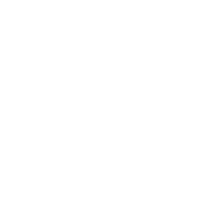

In [73]:
# display the saved image
from IPython.display import Image
Image(filename=filename)

## Baby Robot Control

The appearance and movement of Baby Robot can be controlled using the '_robot_' configuration setting, which has the following parameters:

**_control if Baby Robot should be shown:_**</br>
* _show_ : True (default) or False

**_the initial robot sprite:_**</br>
* <i>initial_sprite</i> : default = 4 (center view) 

**_the number of steps before a sprite change:_**</br>
* <i>sprite_change</i> : default = 2

**_robot speed parameters:_**</br>
* <i>sleep</i> : the time to pause between each move step (default = 0.07s)
* <i>canvas_sleep</i> : Google Colab specific pause (default = 40ms)

In [74]:
setup = {}
env = babyrobot.make("BabyRobot-v0",**setup)
env.render()

MultiCanvas(height=196, sync_image_data=True, width=196)